### Sameha Yousef - Project 3

In [11]:
# Importing all necessary libraries 
from keras.preprocessing.image import ImageDataGenerator 

import tensorflow as tf

from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import backend as K 
  
img_width, img_height = 224, 224

In [12]:
import os

In [13]:
# main directory
main_dir = "/Users/samehayousef/Desktop/Summer Training/Data_Science&AI/Deep Learning/data"

In [14]:
# Setting path to the training directory
train_dir = os.path.join(main_dir, 'train')

# Setting path to the test directory
test_dir = os.path.join(main_dir, 'test')

In [15]:
# Directory with train cats images
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with train dogs images
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with test cats image
test_cats_dir = os.path.join(test_dir, 'cats')

# Directory with test dogs image
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [16]:
# Creating a list of filenames in each directory
train_cat_names = os.listdir(train_cats_dir)
print(train_cat_names[:5])  # printing a list of the first 10 filenames

train_dog_names = os.listdir(train_dogs_dir)
print(train_dog_names[:5])

test_cat_names = os.listdir(test_cats_dir)
print(test_cat_names[:5])

test_dog_names = os.listdir(test_dogs_dir)
print(test_dog_names[:5])

['8.jpg', '9.jpg', '14.jpg', '15.jpg', '17.jpg']
['8.jpg', '9.jpg', '14.jpg', '15.jpg', '17.jpg']
['101.jpg', '102.jpg', '103.jpg', '107.jpg', '106.jpg']
['101.jpg', '102.jpg', '103.jpg', '107.jpg', '106.jpg']


In [17]:
# Printing total number of images present in each set
print('Total no of images in training set:', len(train_cat_names + train_dog_names))
print("Total no of images in test set:", len(test_cat_names + test_dog_names))

Total no of images in training set: 40
Total no of images in test set: 20


In [18]:
import matplotlib.pyplot as plt

In [33]:
# Data Visualization
import matplotlib.image as mpimg

# Setting the no of rows and columns
ROWS = 4

COLS = 4
# Setting the figure size
fig = plt.gcf()

# get current figure; allows us to get a reference to current figure when using pyplot
fig.set_size_inches(15, 15);

<Figure size 1080x1080 with 0 Axes>

In [34]:
# get the directory to each image file in the trainset
cats_pic = [os.path.join(train_cats_dir,   filename) for filename in train_cat_names[:8]]
dogs_pic = [os.path.join(train_dogs_dir, filename) for filename in train_dog_names[:8]]

# merge covid and normal lists
mergedlist = cats_pic + dogs_pic
mergedlist

['/Users/samehayousef/Desktop/Summer Training/Data_Science&AI/Deep Learning/data/train/cats/8.jpg',
 '/Users/samehayousef/Desktop/Summer Training/Data_Science&AI/Deep Learning/data/train/cats/9.jpg',
 '/Users/samehayousef/Desktop/Summer Training/Data_Science&AI/Deep Learning/data/train/cats/14.jpg',
 '/Users/samehayousef/Desktop/Summer Training/Data_Science&AI/Deep Learning/data/train/cats/15.jpg',
 '/Users/samehayousef/Desktop/Summer Training/Data_Science&AI/Deep Learning/data/train/cats/17.jpg',
 '/Users/samehayousef/Desktop/Summer Training/Data_Science&AI/Deep Learning/data/train/cats/16.jpg',
 '/Users/samehayousef/Desktop/Summer Training/Data_Science&AI/Deep Learning/data/train/cats/12.jpg',
 '/Users/samehayousef/Desktop/Summer Training/Data_Science&AI/Deep Learning/data/train/cats/13.jpg',
 '/Users/samehayousef/Desktop/Summer Training/Data_Science&AI/Deep Learning/data/train/dogs/8.jpg',
 '/Users/samehayousef/Desktop/Summer Training/Data_Science&AI/Deep Learning/data/train/dogs/9.

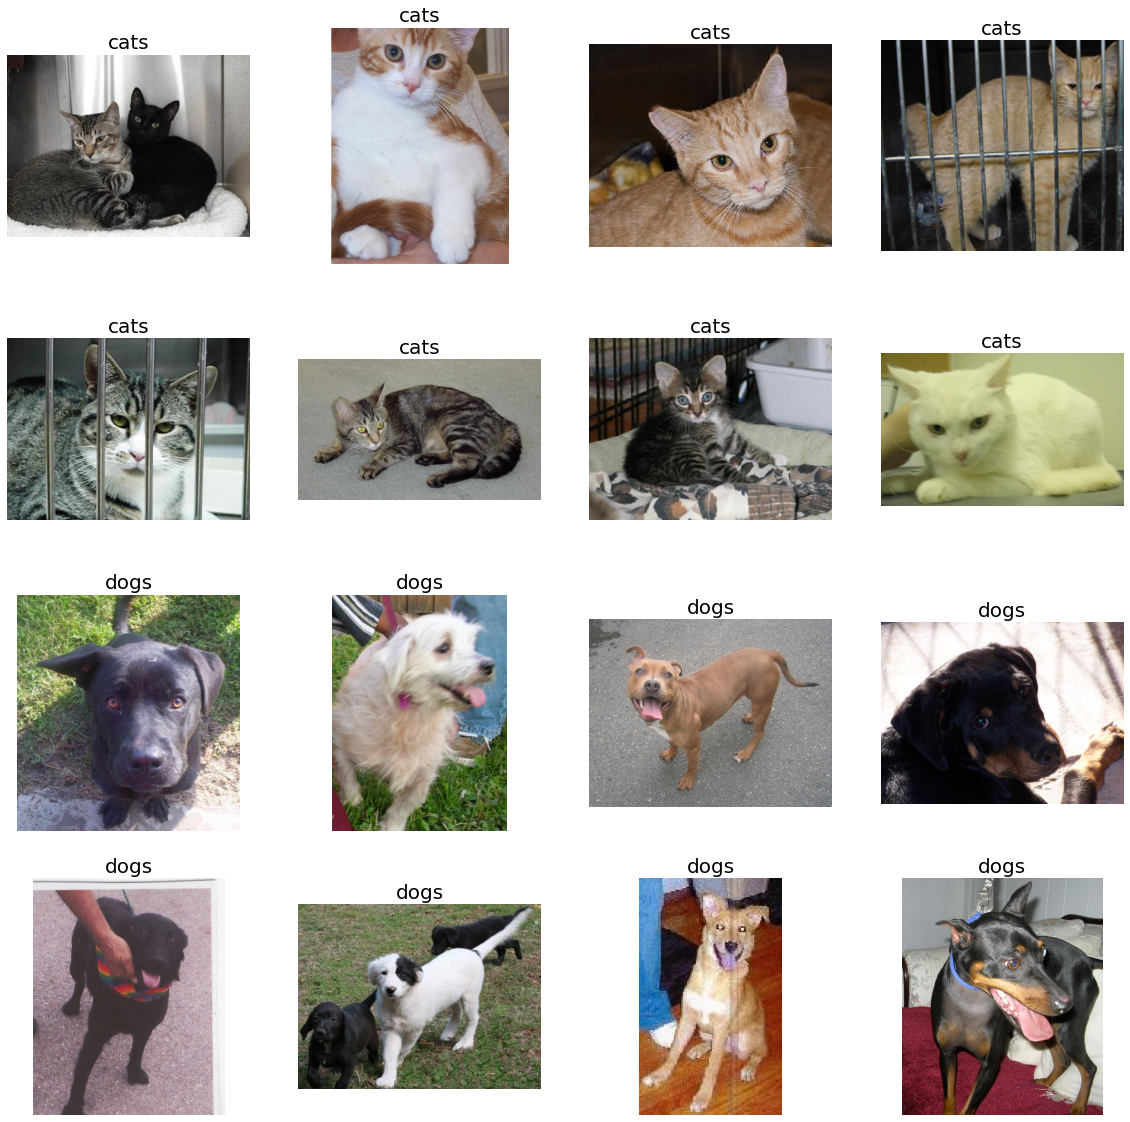

In [114]:
plt.figure(figsize=(20, 20))
# Plotting the images in the merged list
for i, img_path in enumerate(mergedlist):
    # getting the filename from the directory
    data = img_path.split('/', 6)[6]
    
    t = img_path.split('/', 10)[9]


    # creating a subplot of images with the no. of rows and colums with index no
    sp = plt.subplot(ROWS, COLS, i+1)
    
    # turn off axis
    sp.axis('Off')
    
    # reading the image data to an array
    img = mpimg.imread(img_path)
    
    # setting title of plot as the filename
    sp.set_title(t, fontsize=20)
    
    # displaying data as image
    plt.imshow(img, cmap='gray')

In [36]:
if K.image_data_format() == 'channels_first': 
    input_shape = (3, img_width, img_height) 
else: 
    input_shape = (img_width, img_height, 3) 

In [37]:
input_shape

(224, 224, 3)

In [46]:
import keras

keras.backend.clear_session()

model2 = Sequential() 

model2.add(Conv2D(filters=32, kernel_size=(5, 5), input_shape=input_shape)) 
model2.add(Activation('relu')) 
model2.add(MaxPooling2D(pool_size=(2, 2), strides = 2)) 
  
model2.add(Conv2D(filters=64, kernel_size=(5, 5))) 
model2.add(Activation('relu')) 
model2.add(MaxPooling2D(pool_size=(2, 2), strides = 2)) 
model2.add(Dense(32))



model2.add(Flatten()) 
model2.add(Dense(32))


model2.add(Activation('relu')) 
model2.add(Dropout(0.4)) 


model2.add(Dense(1))

model2.add(Activation('sigmoid')) 

In [47]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 32)      2432      
_________________________________________________________________
activation (Activation)      (None, 220, 220, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 106, 106, 64)      51264     
_________________________________________________________________
activation_1 (Activation)    (None, 106, 106, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 64)        0         
_________________________________________________________________
dense (Dense)                (None, 53, 53, 32)        2

In [56]:
test_images = [test_image1,test_image2, test_image3, test_image4,test_image5, test_image6,test_image7 ]

In [57]:
test_image_resize = [image.load_img(x, target_size=(224,224)) for x in test_images]

In [58]:
images = [image.img_to_array(x) for x in test_image_resize]

In [59]:
print([x.shape for x in images])

[(224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3)]


In [60]:
images = [np.expand_dims(x, axis=0) for x in images]

In [61]:
print([x.shape for x in images])

[(1, 224, 224, 3), (1, 224, 224, 3), (1, 224, 224, 3), (1, 224, 224, 3), (1, 224, 224, 3), (1, 224, 224, 3), (1, 224, 224, 3)]


In [62]:
# making prediction with model
predictions = list()
for i in images:
    predictions.append(model.predict(i))

In [67]:
results = list()


for p in predictions:
    print(p)
    if p < 0.5:
        results.append('cat')
    else:
        results.append('dog')



[[0.9839276]]
[[4.8280845e-07]]
[[1.]]
[[0.99999976]]
[[0.27821398]]
[[1.]]
[[0.00168201]]


In [68]:
results

['dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'cat']

In [69]:
[print(i.split('/',10)[9]) for i in test_images]

cats
cats
cats
cats
dogs
dogs
dogs


[None, None, None, None, None, None, None]

In [70]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}

In [72]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 222, 222, 64)      1792      
_________________________________________________________________
activation_4 (Activation)    (None, 222, 222, 64)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 109, 109, 64)      36928     
_________________________________________________________________
activation_5 (Activation)    (None, 109, 109, 64)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 52, 52, 64)       

#### Using DataGenerator:

In [39]:
train_data_dir =  train_dir
validation_data_dir = test_dir

In [40]:
train_datagen = ImageDataGenerator( 
                                    rescale=1. / 255, 
                                    shear_range=0.2, 
                                    zoom_range=0.2, 
                                    horizontal_flip=True
                                  ) 

In [42]:
epochs     = 100
batch_size = 4

In [43]:
test_datagen = ImageDataGenerator(rescale=1. / 255) 
  
train_generator = train_datagen.flow_from_directory( 
                                                    train_data_dir, 
                                                    target_size=(img_width, img_height), 
                                                    batch_size=batch_size, 
                                                    class_mode='binary') 
  
validation_generator = test_datagen.flow_from_directory( 
                                                    validation_data_dir, 
                                                    target_size=(img_width, img_height), 
                                                    batch_size=batch_size, 
                                                    class_mode='binary') 

Found 40 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


### USING MODEL 2

In [48]:
%%time
model2.compile(loss='binary_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy']) 

history = model2.fit( 
                train_generator, 
                #steps_per_epoch=nb_train_samples // batch_size, 
                epochs=epochs, 
                validation_data=validation_generator, 
                callbacks=[
                      # Stopping our training if val_accuracy doesn't improve after 20 epochs
                      tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', 
                                                      patience=20),
                      # Saving the best weights of our model in the model directory

                      # We don't want to save just the weight, but also the model architecture
                      tf.keras.callbacks.ModelCheckpoint('CNN-12_{val_accuracy:.3f}.h5',
                                                           save_best_only=True,
                                                           save_weights_only=False,
                                                           monitor='val_accuracy')
                ]) 

Epoch 1/100
10/10 [==============================] - 3s 211ms/step - loss: 3.8806 - accuracy: 0.5662 - val_loss: 2.5615 - val_accuracy: 0.5000
Epoch 2/100
10/10 [==============================] - 2s 175ms/step - loss: 1.2830 - accuracy: 0.4995 - val_loss: 0.6807 - val_accuracy: 0.5000
Epoch 3/100
10/10 [==============================] - 2s 171ms/step - loss: 0.6700 - accuracy: 0.6243 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 4/100
10/10 [==============================] - 2s 175ms/step - loss: 0.7629 - accuracy: 0.4630 - val_loss: 0.6935 - val_accuracy: 0.5500
Epoch 5/100
10/10 [==============================] - 2s 210ms/step - loss: 0.7398 - accuracy: 0.5417 - val_loss: 0.6898 - val_accuracy: 0.6000
Epoch 6/100
10/10 [==============================] - 2s 247ms/step - loss: 0.6908 - accuracy: 0.6854 - val_loss: 0.6806 - val_accuracy: 0.5000
Epoch 7/100
10/10 [==============================] - 2s 229ms/step - loss: 0.7247 - accuracy: 0.4434 - val_loss: 0.6890 - val_accuracy: 0.5000

In [49]:
history.history

{'loss': [4.209034442901611,
  1.2541134357452393,
  0.7543431520462036,
  0.7811539173126221,
  0.7813600301742554,
  0.7800792455673218,
  0.744263768196106,
  0.6610766649246216,
  1.0192512273788452,
  0.8340373039245605,
  0.689268171787262,
  0.8153427839279175,
  1.0743671655654907,
  0.6951032280921936,
  0.7365662455558777,
  0.8691929578781128,
  0.7646328806877136,
  1.1290309429168701,
  1.6351406574249268,
  1.0939664840698242,
  1.1031229496002197,
  1.2387856245040894,
  0.5867096185684204,
  1.1391098499298096,
  0.6820595860481262,
  0.5105732083320618,
  0.9045423269271851,
  0.4909222722053528,
  0.48664578795433044,
  0.3881838917732239],
 'accuracy': [0.550000011920929,
  0.4749999940395355,
  0.4749999940395355,
  0.44999998807907104,
  0.5,
  0.6000000238418579,
  0.4749999940395355,
  0.625,
  0.550000011920929,
  0.5249999761581421,
  0.5249999761581421,
  0.625,
  0.574999988079071,
  0.6499999761581421,
  0.5249999761581421,
  0.625,
  0.574999988079071,
  0.

In [50]:
import matplotlib.pyplot as plt

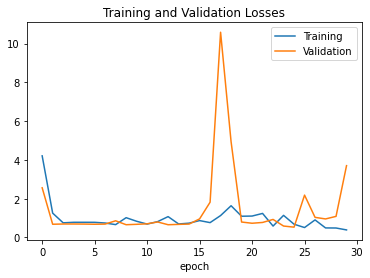

In [51]:
# Plot graph between training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation Losses')
plt.xlabel('epoch');

Text(0.5, 0, 'epoch')

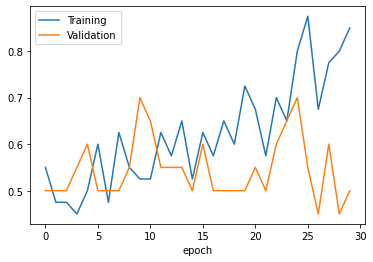

In [52]:
# Plot graph between training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.xlabel('epoch')

In [53]:
# Getting test accuracy and loss
test_loss, test_acc = model.evaluate(validation_generator)
print('Test loss: {} Test Acc: {}'.format(test_loss, test_acc))

5/5 [==============================] - 0s 60ms/step - loss: 0.6853 - accuracy: 0.4500
Test loss: 0.6852797865867615 Test Acc: 0.44999998807907104


In [54]:
import numpy as np
from keras.preprocessing import image

In [55]:
test_image1 = mergedlist[0]
test_image2 = mergedlist[1]
test_image3 = mergedlist[2]
test_image4 = mergedlist[3]
test_image5 = mergedlist[8]
test_image6 = mergedlist[-1]
test_image7 = mergedlist[11]

In [56]:
test_images = [test_image1,test_image2, test_image3, test_image4,test_image5, test_image6,test_image7 ]

In [57]:
test_image_resize = [image.load_img(x, target_size=(224,224)) for x in test_images]

In [58]:
images = [image.img_to_array(x) for x in test_image_resize]

In [59]:
print([x.shape for x in images])

[(224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3)]


In [60]:
images = [np.expand_dims(x, axis=0) for x in images]

In [61]:
print([x.shape for x in images])

[(1, 224, 224, 3), (1, 224, 224, 3), (1, 224, 224, 3), (1, 224, 224, 3), (1, 224, 224, 3), (1, 224, 224, 3), (1, 224, 224, 3)]


In [62]:
# making prediction with model
predictions = list()
for i in images:
    predictions.append(model.predict(i))

In [67]:
results = list()


for p in predictions:
    print(p)
    if p < 0.5:
        results.append('cat')
    else:
        results.append('dog')



[[0.9839276]]
[[4.8280845e-07]]
[[1.]]
[[0.99999976]]
[[0.27821398]]
[[1.]]
[[0.00168201]]


In [68]:
results

['dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'cat']

In [69]:
[print(i.split('/',10)[9]) for i in test_images]

cats
cats
cats
cats
dogs
dogs
dogs


[None, None, None, None, None, None, None]

In [70]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}

### USING MODEL 1

In [102]:
keras.backend.clear_session()
model = Sequential() 

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=input_shape)) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Conv2D(filters=64, kernel_size=(3, 3))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Conv2D(filters=64, kernel_size=(3, 3))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Flatten()) 

model.add(Dense(256)) 
model.add(Activation('relu')) 
model.add(Dropout(0.2)) 

model.add(Dense(1)) 

model.add(Activation('sigmoid')) 

In [103]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 222, 222, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      36928     
_________________________________________________________________
activation_1 (Activation)    (None, 109, 109, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        3

In [104]:
%%time
model.compile(loss='binary_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy']) 

history = model.fit( 
                train_generator, 
                #steps_per_epoch=nb_train_samples // batch_size, 
                epochs=epochs, 
                validation_data=validation_generator, 
                callbacks=[
                      # Stopping our training if val_accuracy doesn't improve after 20 epochs
                      tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', 
                                                      patience=20),
                      # Saving the best weights of our model in the model directory

                      # We don't want to save just the weight, but also the model architecture
                      tf.keras.callbacks.ModelCheckpoint('CNN-12_{val_accuracy:.3f}.h5',
                                                           save_best_only=True,
                                                           save_weights_only=False,
                                                           monitor='val_accuracy')
                ]) 

Epoch 1/100
10/10 [==============================] - 4s 297ms/step - loss: 1.3350 - accuracy: 0.4524 - val_loss: 1.5034 - val_accuracy: 0.5000
Epoch 2/100
10/10 [==============================] - 3s 251ms/step - loss: 0.8251 - accuracy: 0.5405 - val_loss: 0.6919 - val_accuracy: 0.6500
Epoch 3/100
10/10 [==============================] - 3s 248ms/step - loss: 0.6975 - accuracy: 0.5111 - val_loss: 0.7003 - val_accuracy: 0.4000
Epoch 4/100
10/10 [==============================] - 2s 245ms/step - loss: 0.7278 - accuracy: 0.6163 - val_loss: 0.7853 - val_accuracy: 0.5000
Epoch 5/100
10/10 [==============================] - 2s 241ms/step - loss: 0.9026 - accuracy: 0.4683 - val_loss: 0.6964 - val_accuracy: 0.5000
Epoch 6/100
10/10 [==============================] - 3s 257ms/step - loss: 0.6938 - accuracy: 0.5452 - val_loss: 0.6927 - val_accuracy: 0.5500
Epoch 7/100
10/10 [==============================] - 3s 269ms/step - loss: 0.6962 - accuracy: 0.5672 - val_loss: 0.6882 - val_accuracy: 0.6000

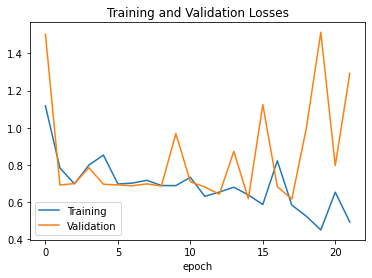

In [105]:
# Plot graph between training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation Losses')
plt.xlabel('epoch');

Text(0.5, 0, 'epoch')

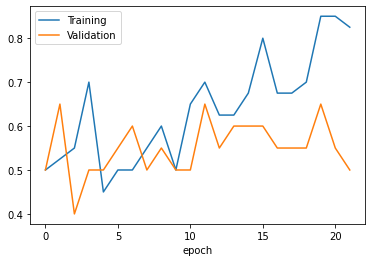

In [109]:
# Plot graph between training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.xlabel('epoch')

In [111]:
# Getting test accuracy and loss
m1_test_loss, m1_test_acc = model.evaluate(validation_generator)
print('Test loss: {} Test Acc: {}'.format(test_loss, test_acc))

5/5 [==============================] - 0s 44ms/step - loss: 1.2927 - accuracy: 0.5000
Test loss: 0.6852797865867615 Test Acc: 0.44999998807907104


In [112]:
test_images = [test_image1,test_image2, test_image3, test_image4,test_image5, test_image6,test_image7 ]

test_image_resize = [image.load_img(x, target_size=(224,224)) for x in test_images]

images = [image.img_to_array(x) for x in test_image_resize]

print([x.shape for x in images])

images = [np.expand_dims(x, axis=0) for x in images]

print([x.shape for x in images])

# making prediction with model
predictions = list()
for i in images:
    predictions.append(model.predict(i))

results = list()


for p in predictions:
    print(p)
    if p < 0.5:
        results.append('cat')
    else:
        results.append('dog')



print('Results', results)

[print(i.split('/',10)[9]) for i in test_images]

train_generator.class_indices

[(224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3)]
[(1, 224, 224, 3), (1, 224, 224, 3), (1, 224, 224, 3), (1, 224, 224, 3), (1, 224, 224, 3), (1, 224, 224, 3), (1, 224, 224, 3)]
[[0.]]
[[1.1358034e-19]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
Results ['cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat']
cats
cats
cats
cats
dogs
dogs
dogs


{'cats': 0, 'dogs': 1}